In [3]:
# example 3 build a neural network
import warnings
warnings.filterwarnings("ignore")

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function == None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [8]:
# data
x_data = np.linspace(-1, 1, 300, dtype = np.float32)[:, np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

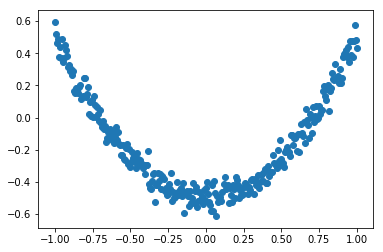

In [10]:
plt.scatter(x_data, y_data)
plt.show()

In [11]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [16]:
# construct network
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function = None)

In [18]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), reduction_indices=[1]))

In [20]:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [21]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [26]:
# training
loss_trend = []
for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 50 == 0:
        # print(sess.run(loss, feed_dict = {xs:x_data, ys:y_data}))
        loss_trend.append(sess.run(loss, feed_dict = {xs:x_data, ys:y_data}))

In [27]:
loss_trend

[0.0035291815,
 0.0035035887,
 0.003477937,
 0.0034528088,
 0.0034271316,
 0.0034003265,
 0.0033708492,
 0.0033381493,
 0.0033058883,
 0.0032731057,
 0.0032500464,
 0.003227489,
 0.0032060118,
 0.0031890806,
 0.0031749674,
 0.0031588734,
 0.0031441376,
 0.0031283086,
 0.0031150882,
 0.0031034613]

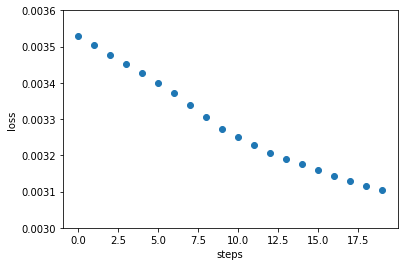

In [33]:
plt.scatter(x=range(len(loss_trend)), y=loss_trend)
plt.ylim(0.003, 0.0036)
plt.ylabel('loss')
plt.xlabel('steps')
plt.show()

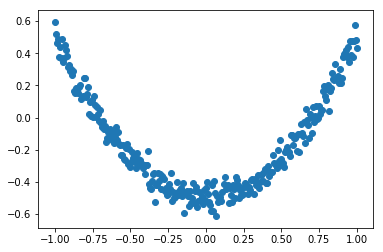

In [42]:
# visualize data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion
plt.show()

# plot the results
for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 50 == 0:
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict = {xs:x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)
        plt.show()

In [34]:
# https://morvanzhou.github.io/tutorials/machine-learning/tensorflow/3-2-create-NN/